In [3]:
# Case Study 2: Feature Selection and Regularization

# library(lintr)
# lint("pa06.ipynb")
library(ISLR)
data(Credit)
Credit$ID <- NULL
summary(Credit)

# See data dictionary for Credit dataset
# Target var is balance - integer based
# income, limit, rating, cards, age, and education are numeric
# gender, student, married, and ethnicity are categorical

     Income           Limit           Rating          Cards      
 Min.   : 10.35   Min.   :  855   Min.   : 93.0   Min.   :1.000  
 1st Qu.: 21.01   1st Qu.: 3088   1st Qu.:247.2   1st Qu.:2.000  
 Median : 33.12   Median : 4622   Median :344.0   Median :3.000  
 Mean   : 45.22   Mean   : 4736   Mean   :354.9   Mean   :2.958  
 3rd Qu.: 57.47   3rd Qu.: 5873   3rd Qu.:437.2   3rd Qu.:4.000  
 Max.   :186.63   Max.   :13913   Max.   :982.0   Max.   :9.000  
      Age          Education        Gender    Student   Married  
 Min.   :23.00   Min.   : 5.00    Male :193   No :360   No :155  
 1st Qu.:41.75   1st Qu.:11.00   Female:207   Yes: 40   Yes:245  
 Median :56.00   Median :14.00                                   
 Mean   :55.67   Mean   :13.45                                   
 3rd Qu.:70.00   3rd Qu.:16.00                                   
 Max.   :98.00   Max.   :20.00                                   
            Ethnicity      Balance       
 African American: 99   Min.   :  

In [4]:
# Task 1: Consider a data issue
# Identify a variable that may have ethical concerns
# discuss the benefits and concersns related to using this var
# in a business problem
# regardless of concerns use this var is subsequent analyses

# 1 - Pro: var may provide useful info for understanding/predicting
# card balance. the predictive power here may have huge societal benefits

# 2 - con: incorporating ethnicity, a protected class, may be critisized
# on grounds of unfair discrimination and raise legal concerns

# the same considerations apply to gender

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] 90

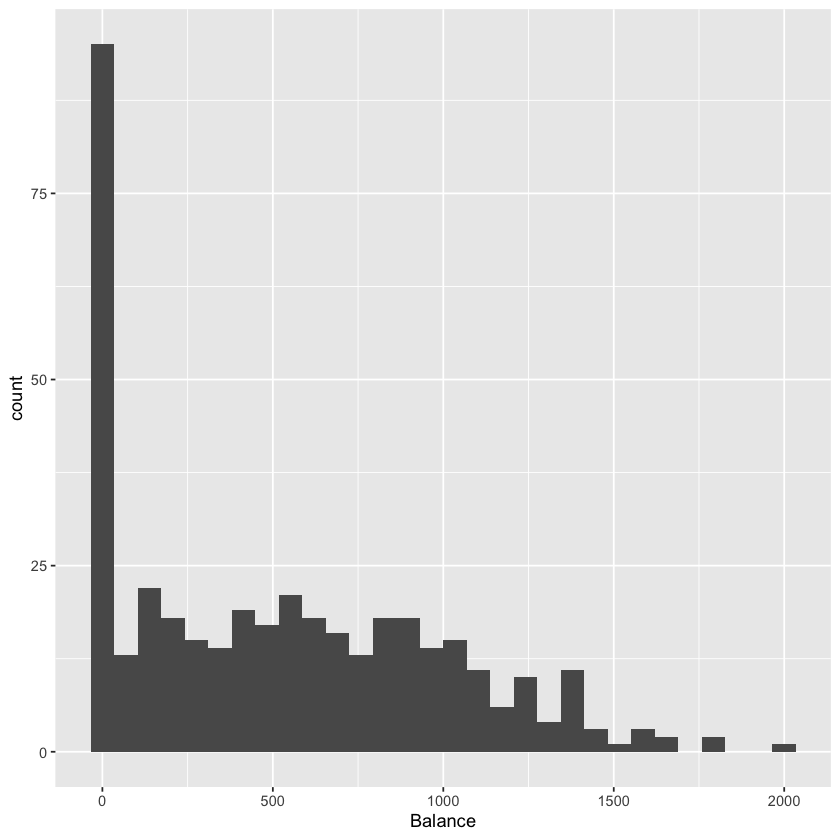

In [5]:
# Task 2:
# a - investigate the distribution of the target var
# b - create a corr matrix for all numerics
# b_i - examine pairwise corr, both in predictors and in rel to target
# b_ii - explain whether it is reasonable to delete Limit.
# -- regardless, delete this for later consideration
# c - create visual representations between numerics and target to find
# -- best predictors

# Note - its generally a good idea to discuss target var distribution
# even when not asked to do so

library(ggplot2)
ggplot(Credit, aes(x = Balance)) +
    geom_histogram()

nrow(Credit[Credit$Balance == 0, ])

# 90 obs have balance = 0
# log transformation should not be used
# since there are no negative values, sqrt() can be used to correct
# skewness

In [6]:
# calculate corr matrix for numerics
cor.matrix <- cor(Credit[, c(1:6, 11)])
print("Correlation Matrix")
round(cor.matrix, digits = 4)

# we make 2 obs:

# 1 - which vars are predictive of balance
# -- limit, and rating are strong
# -- income is moderate
# 2 - High corr b/t vars
# -- b/t income and limit
# -- b/t income and rating
# -- b/t limit and rating
# -- suggests duplication of info and can complicate interpretation
# -- limit and rating are almost positively collinear.

[1] "Correlation Matrix"


,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.0000,0.7921,0.7914,-0.0183,0.1753,-0.0277,0.4637
Limit,0.7921,1.0000,0.9969,0.0102,0.1009,-0.0235,0.8617
Rating,0.7914,0.9969,1.0000,0.0532,0.1032,-0.0301,0.8636
Cards,-0.0183,0.0102,0.0532,1.0000,0.0429,-0.0511,0.0865
Age,0.1753,0.1009,0.1032,0.0429,1.0000,0.0036,0.0018
Education,-0.0277,-0.0235,-0.0301,-0.0511,0.0036,1.0000,-0.0081
Balance,0.4637,0.8617,0.8636,0.0865,0.0018,-0.0081,1.0000


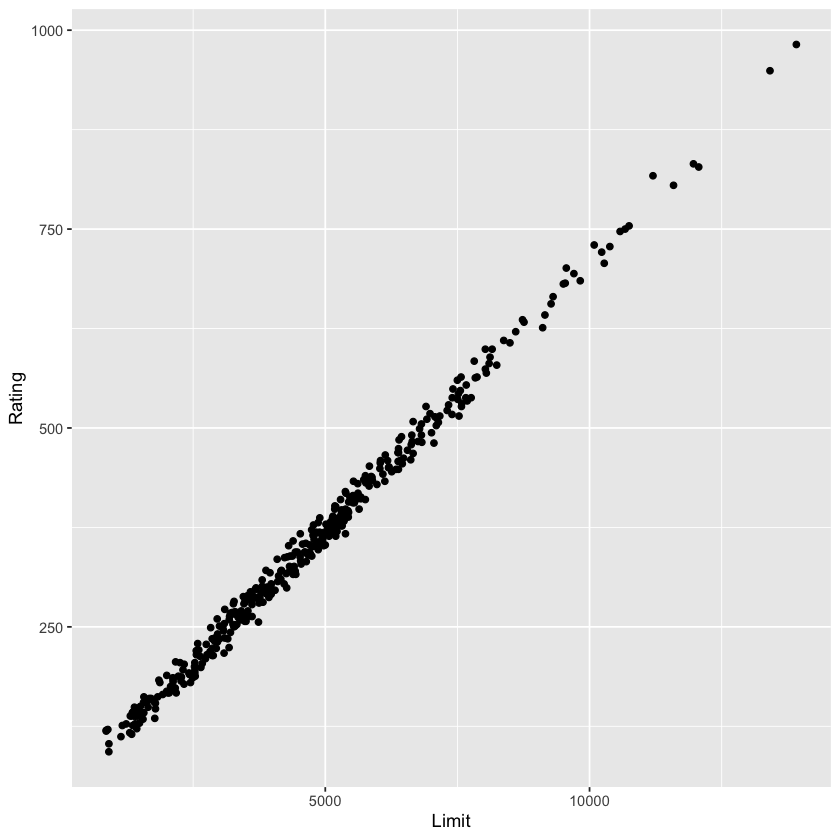

In [7]:
ggplot(Credit, aes(x = Limit, y = Rating)) +
    geom_point()

# the 2 vars are almost perfectly linear to each other
# one will not contribute much when the other is present
# keep only one, so delete limit
# (as rating and balance have a slightly higher corr)

Credit$Limit <- NULL

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


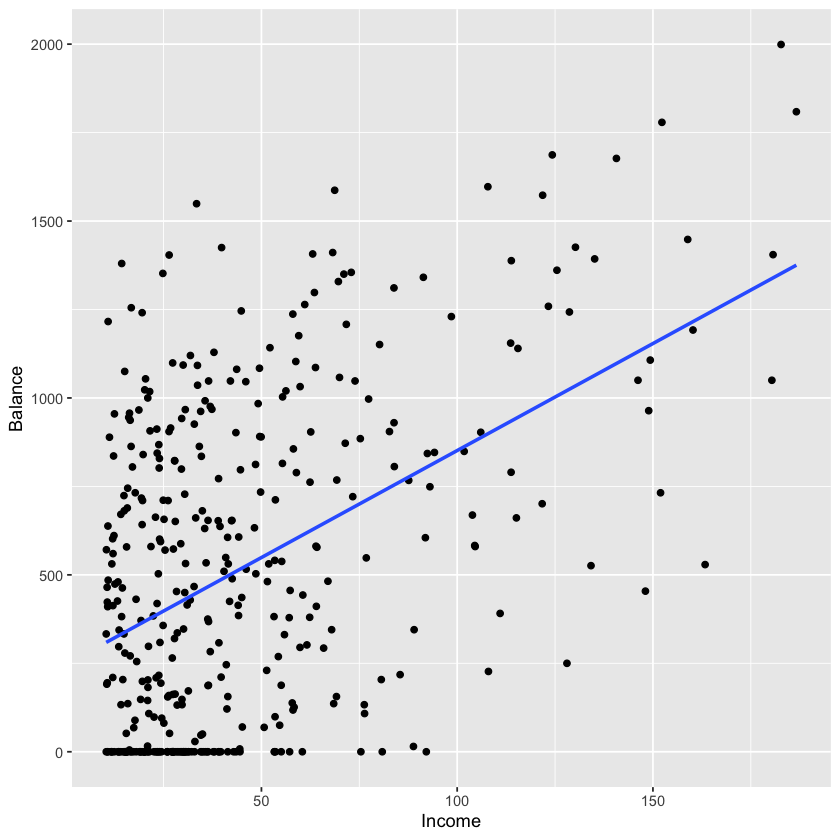

`geom_smooth()` using formula = 'y ~ x'


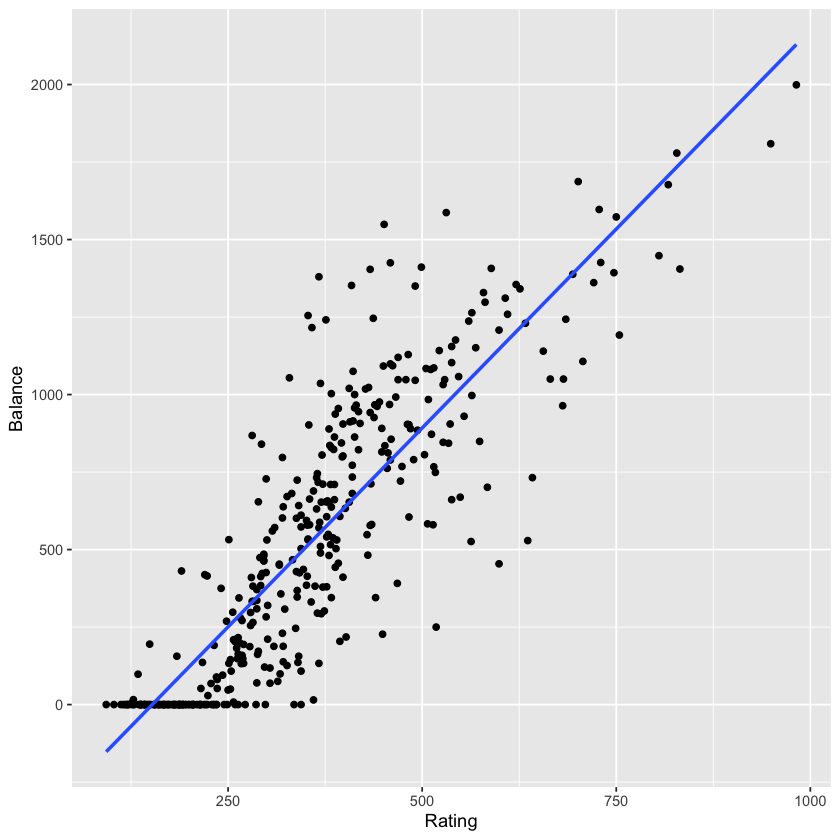

`geom_smooth()` using formula = 'y ~ x'


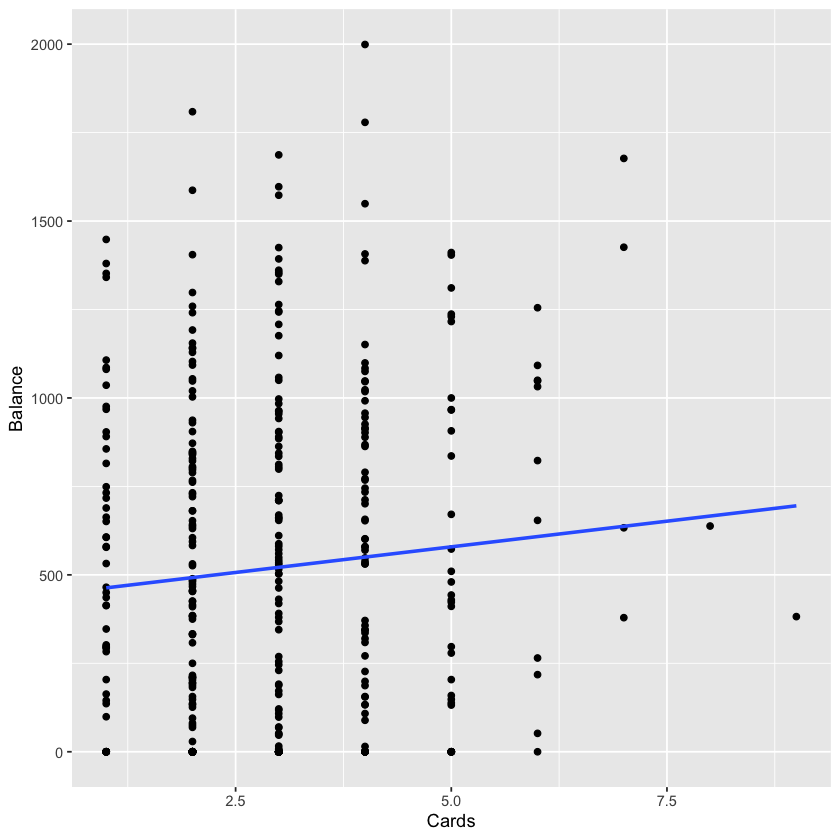

`geom_smooth()` using formula = 'y ~ x'


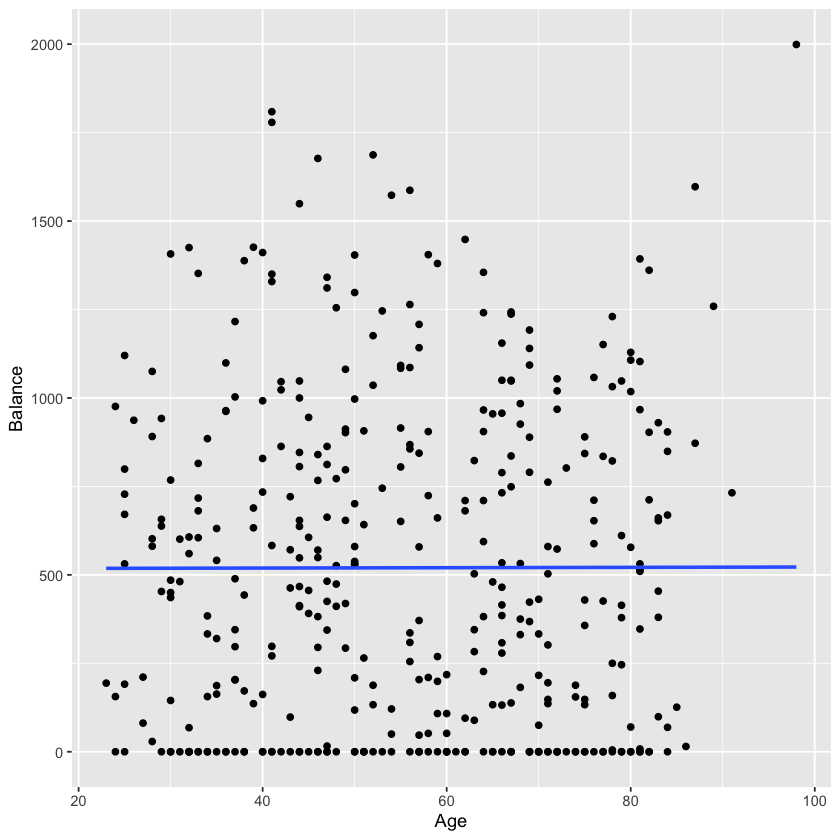

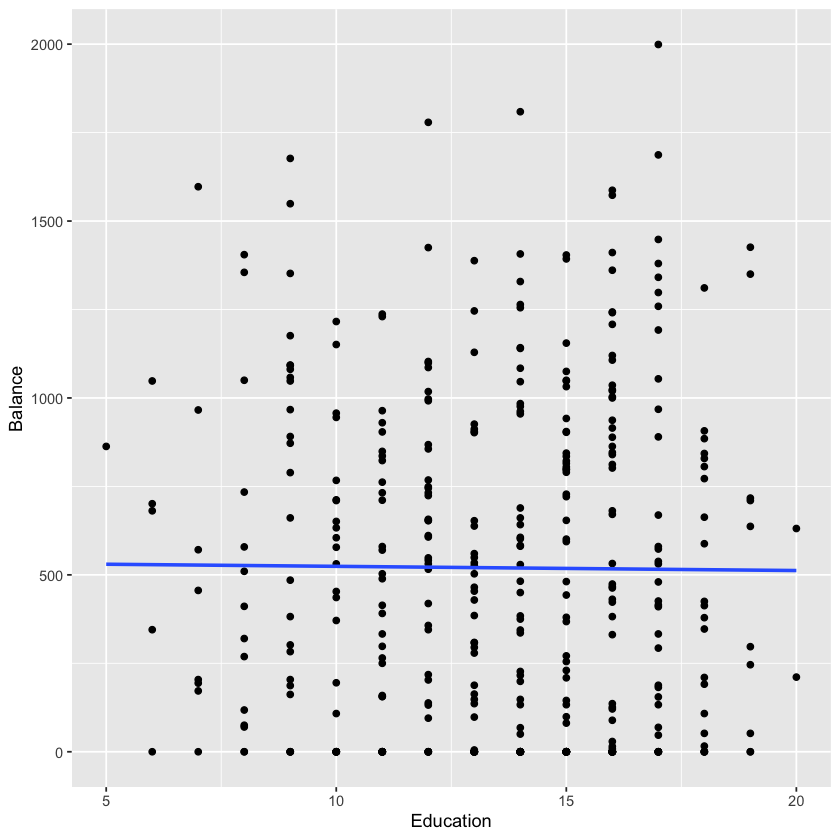

In [8]:
# Visual representations
vars.numeric <- colnames(Credit[, 1:5])
for (i in vars.numeric) {
    plot <- ggplot(Credit, aes(x = Credit[, i], y = Balance)) +
        geom_point() +
        geom_smooth(method = "lm", se = FALSE) + labs(x = i)
    print(plot)
}

In [9]:
# Task 3: Explore factor variables
# Investigate distribution of factor vars. ID a factor var likely
# to predict the target. For this factor:
# a - show key descriptive stats
# b - create visual representations
# c - explain why you selected this variable and how the variable
# -- relates to the target

library(tidyverse)
vars.categorical <- c("Gender", "Student", "Married", "Ethnicity")
for (i in vars.categorical) {
    x <- Credit %>%
        group_by_(i) %>%
        summarize(
            mean = mean(Balance), # nolint: indentation_linter.
            median = median(Balance),
            n = n()
        )
    print(x)
}

# Only student stands out as making a significant difference
# b/t its 2 levels yes and no

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
“`group_by_()` was deprecated in dplyr 0.7.0.
ℹ Please use `group_by()` instead.
ℹ See vignette('programming') for more help”


# A tibble: 2 × 4
  Gender    mean median     n
  <fct>    <dbl>  <int> <int>
1 " Male"   510.    463   193
2 "Female"  530.    456   207


Warning message:
“`group_by_()` was deprecated in dplyr 0.7.0.
ℹ Please use `group_by()` instead.
ℹ See vignette('programming') for more help”


# A tibble: 2 × 4
  Student  mean median     n
  <fct>   <dbl>  <dbl> <int>
1 No       480.    424   360
2 Yes      877.    953    40


Warning message:
“`group_by_()` was deprecated in dplyr 0.7.0.
ℹ Please use `group_by()` instead.
ℹ See vignette('programming') for more help”


# A tibble: 2 × 4
  Married  mean median     n
  <fct>   <dbl>  <int> <int>
1 No       523.    467   155
2 Yes      518.    454   245


Warning message:
“`group_by_()` was deprecated in dplyr 0.7.0.
ℹ Please use `group_by()` instead.
ℹ See vignette('programming') for more help”


# A tibble: 3 × 4
  Ethnicity         mean median     n
  <fct>            <dbl>  <dbl> <int>
1 African American  531     480    99
2 Asian             512.    414   102
3 Caucasian         518.    465   199


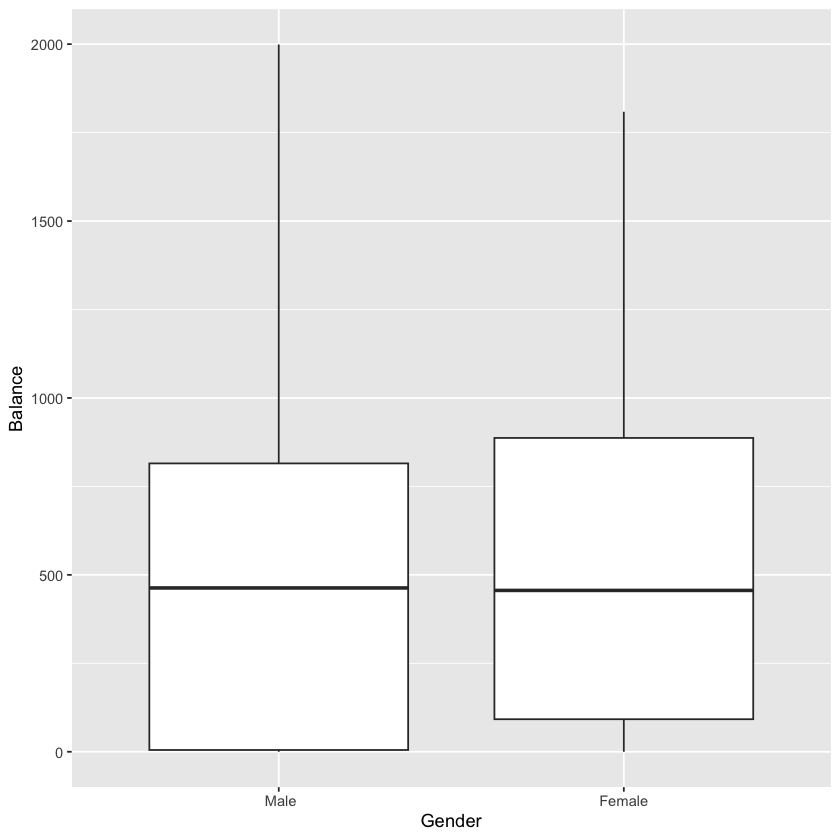

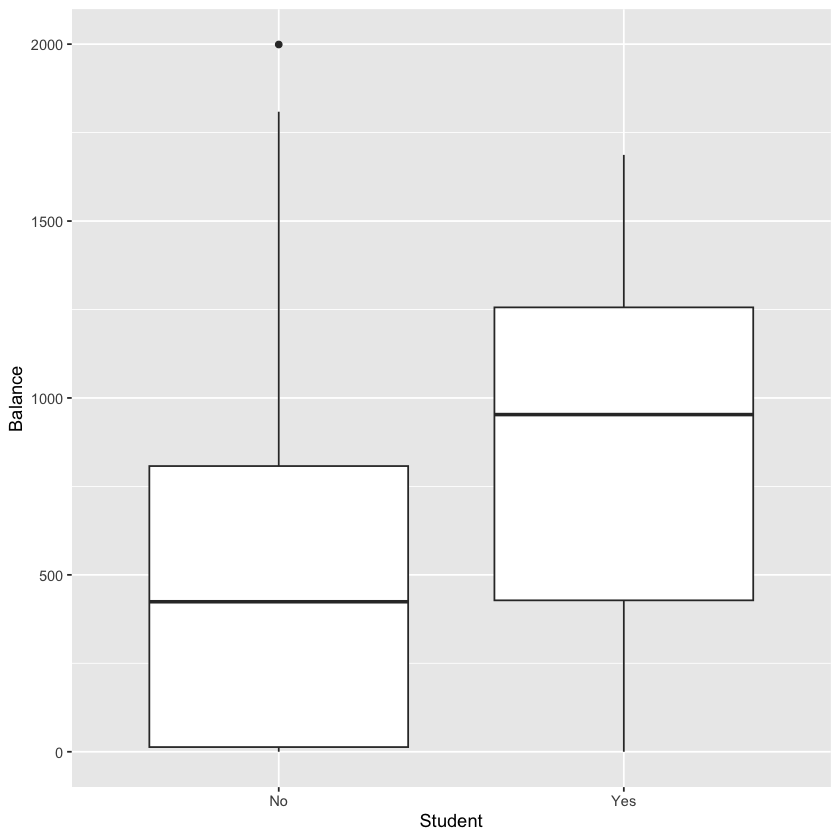

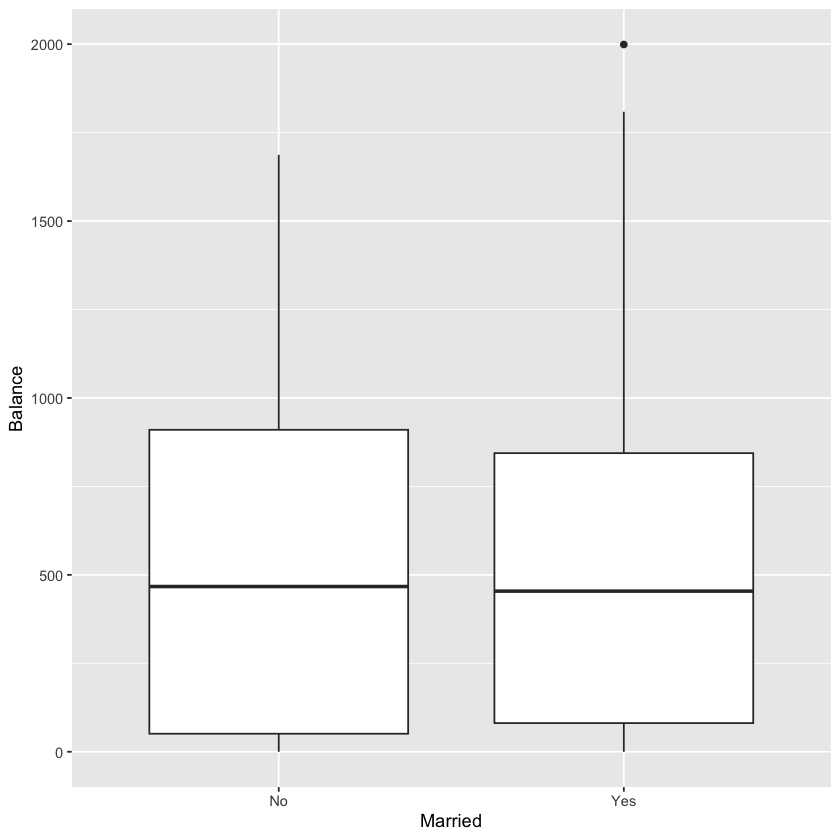

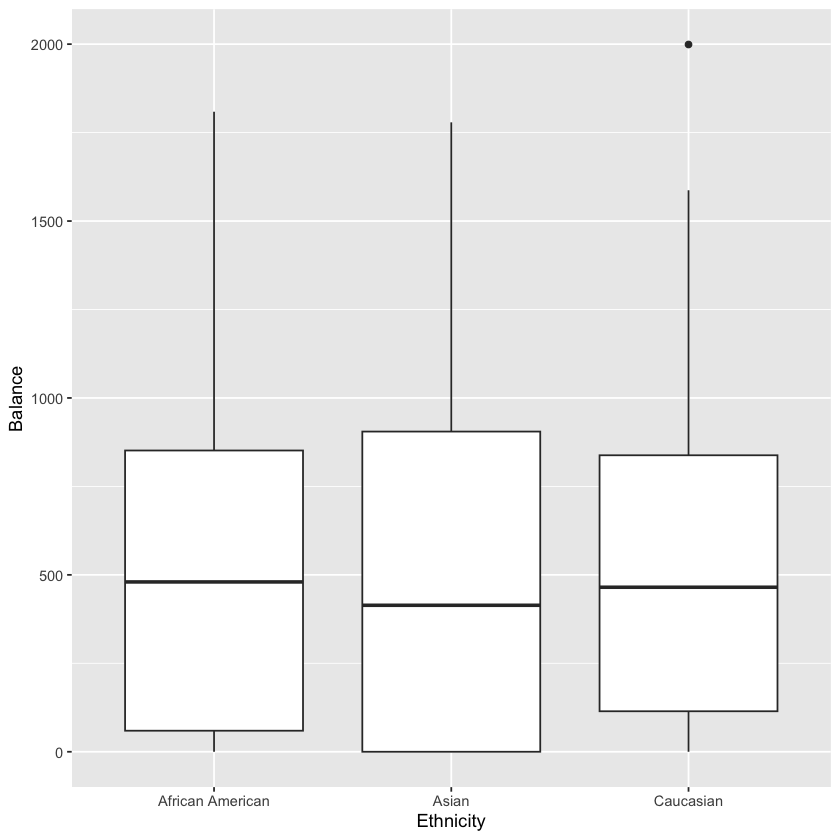

In [10]:
# Visualize with split boxplots
for (i in vars.categorical) {
    plot <- ggplot(Credit, aes(x = Credit[, i], y = Balance)) +
        geom_boxplot() +
        labs(x = i)
    print(plot)
}

`geom_smooth()` using formula = 'y ~ x'


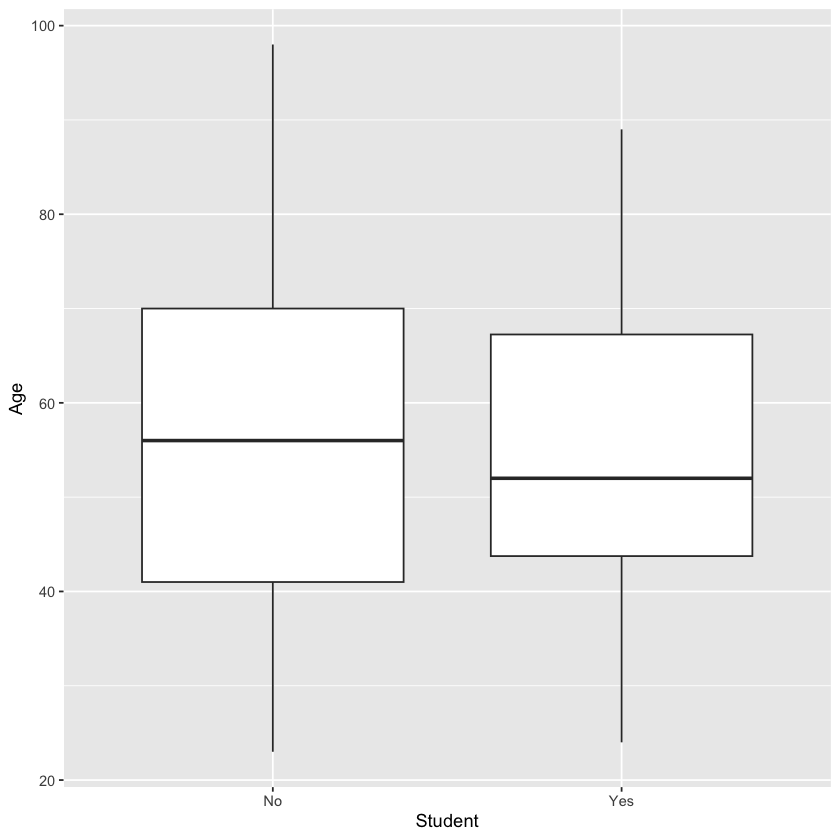

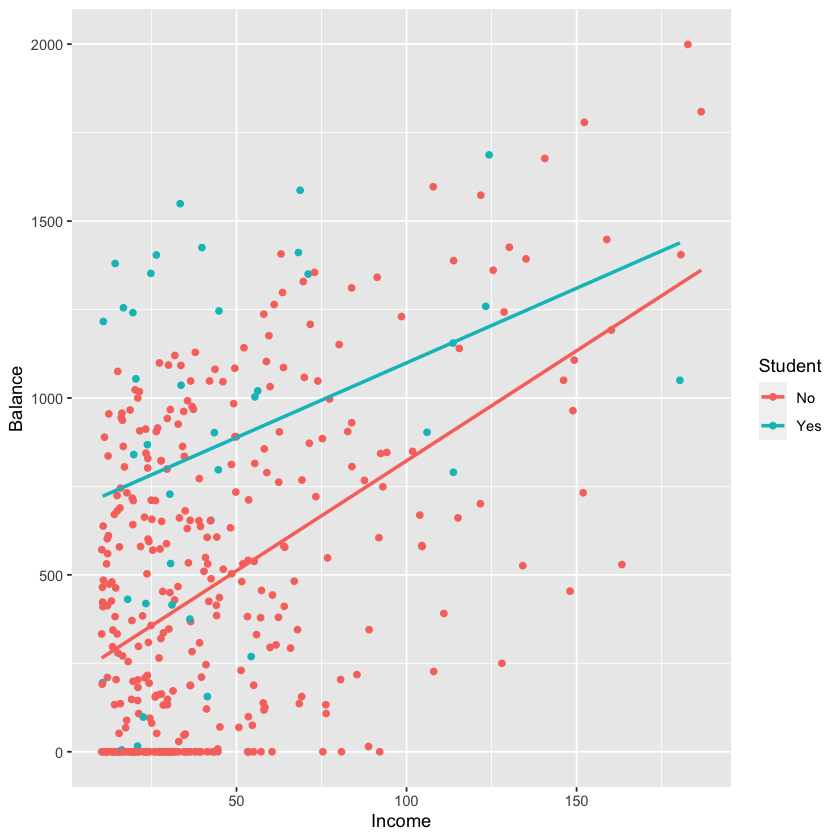

In [11]:
# Task 4
# Comment on:
# a - boxplot of age by student
# b - scatterplot of balance against income colored by student

ggplot(Credit, aes(x = Student, y = Age)) +
    geom_boxplot()

ggplot(Credit, aes(x = Income, y = Balance, color = Student)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)

# Plot 1:
# Students tend to have a lower median age.
# There is some co-dependence but not interaction between age and student.
# The effects of these 2 vars on Balance may be distorted when they serve as predictors at the same time.
# Fortunately, age is unlikely to be a useful predictor anyway.

# Plot 2:
# This plot highlights a possible interaction between the two vars
# the slopes of the two lines differ remarkably

In [15]:
# Task 5:
# a - split data into training and test sets
# b - fit a linear model for balance on all vars except limit
# -- take note of implications in task 4
# -- interpret coef estimates for married and Asian ethnicity
# c - relevel factor vars so that the most frequent level
# -- becomes the baseline level and refit the MLR.
# -- interpret the coef estimates for married and Asian again

library(caret)
set.seed(8964)
partition <- createDataPartition(Credit$Balance, p = 0.75, list = FALSE)
data.train <- Credit[partition, ]
data.test <- Credit[-partition, ]

print("TRAIN")
mean(data.train$Balance)

print("TEST")
mean(data.test$Balance)

[1] "TRAIN"


[1] 520.4352

[1] "TEST"


[1] 518.7374

In [18]:
# Fit the first model
model.full <- lm(Balance ~ . + Income:Student, data = data.train)
summary(model.full)


Call:
lm(formula = Balance ~ . + Income:Student, data = data.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-189.17  -76.46  -15.65   66.69  296.17 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -579.22466   40.08600 -14.450   <2e-16 ***
Income                      -7.93864    0.29465 -26.943   <2e-16 ***
Rating                       4.01246    0.06416  62.540   <2e-16 ***
Cards                        2.89772    4.69168   0.618   0.5373    
Age                         -0.78778    0.35994  -2.189   0.0294 *  
Education                    0.88922    1.92035   0.463   0.6437    
Gender Male                 18.37030   12.00867   1.530   0.1272    
StudentYes                 395.67744   30.72302  12.879   <2e-16 ***
MarriedNo                   20.46469   12.39735   1.651   0.0999 .  
EthnicityAfrican American  -11.95386   14.82444  -0.806   0.4207    
EthnicityAsian              -5.42117   14.68523  -0.369   0.712

In [16]:
# Revel factors so that the baselines are the most populous levels
for (i in vars.categorical) {
    # tabulate frequencies for each factor
    table <- as.data.frame(table(Credit[, i]))
    # determine level with highest freq.
    max <- which.max(table[, 2])
    # save name of level with highest freq.
    level.name <- as.character(table[max, 1])
    # Set baseline to most populous
    Credit[, i] <- relevel(Credit[, i], ref = level.name)
}

summary(Credit[, vars.categorical])

    Gender    Student   Married              Ethnicity  
 Female:207   No :360   Yes:245   Caucasian       :199  
  Male :193   Yes: 40   No :155   African American: 99  
                                  Asian           :102  

In [17]:
# Relevel using new baselines
data.train <- Credit[partition, ]

model.full <- lm(Balance ~ . + Income:Student, data = data.train)
summary(model.full)


Call:
lm(formula = Balance ~ . + Income:Student, data = data.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-189.17  -76.46  -15.65   66.69  296.17 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -579.22466   40.08600 -14.450   <2e-16 ***
Income                      -7.93864    0.29465 -26.943   <2e-16 ***
Rating                       4.01246    0.06416  62.540   <2e-16 ***
Cards                        2.89772    4.69168   0.618   0.5373    
Age                         -0.78778    0.35994  -2.189   0.0294 *  
Education                    0.88922    1.92035   0.463   0.6437    
Gender Male                 18.37030   12.00867   1.530   0.1272    
StudentYes                 395.67744   30.72302  12.879   <2e-16 ***
MarriedNo                   20.46469   12.39735   1.651   0.0999 .  
EthnicityAfrican American  -11.95386   14.82444  -0.806   0.4207    
EthnicityAsian              -5.42117   14.68523  -0.369   0.712

In [19]:
# Task 6: binarize factor variables manually
# a - describe the advantages and disadvantages of binarizing the factor
# -- variables before performing feature selection
# b - regardless, binarize factor vars and refit LMR model

library(caret)
binarizer <- dummyVars(paste("~ ", paste(vars.categorical, collapse = "+")),
                        data = Credit, fullRank = TRUE)

binarized_vars <- data.frame(predict(binarizer, newdata = Credit))
head(binarized_vars)


,Gender..Male,Student.Yes,Married.No,Ethnicity.African.American,Ethnicity.Asian
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,0
2,0,1,0,0,1
3,1,0,1,0,1
4,0,0,1,0,1
5,1,0,0,0,0
6,1,0,1,0,0


In [25]:
# new merge the binarized vars
Credit.bin <- cbind(Credit, binarized_vars)
head(Credit.bin)

Credit.bin$Gender <- NULL
Credit.bin$Student <- NULL
Credit.bin$Married <- NULL
Credit.bin$Ethnicity <- NULL
head(Credit.bin)

data.train.bin <- Credit.bin[partition, ]
data.test.bin <- Credit.bin[-partition, ]

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Gender..Male,Student.Yes,Married.No,Ethnicity.African.American,Ethnicity.Asian
,<dbl>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.891,283,2,34,11,Male,No,Yes,Caucasian,333,1,0,0,0,0
2,106.025,483,3,82,15,Female,Yes,Yes,Asian,903,0,1,0,0,1
3,104.593,514,4,71,11,Male,No,No,Asian,580,1,0,1,0,1
4,148.924,681,3,36,11,Female,No,No,Asian,964,0,0,1,0,1
5,55.882,357,2,68,16,Male,No,Yes,Caucasian,331,1,0,0,0,0
6,80.180,569,4,77,10,Male,No,No,Caucasian,1151,1,0,1,0,0


,Income,Rating,Cards,Age,Education,Balance,Gender..Male,Student.Yes,Married.No,Ethnicity.African.American,Ethnicity.Asian
,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.891,283,2,34,11,333,1,0,0,0,0
2,106.025,483,3,82,15,903,0,1,0,0,1
3,104.593,514,4,71,11,580,1,0,1,0,1
4,148.924,681,3,36,11,964,0,0,1,0,1
5,55.882,357,2,68,16,331,1,0,0,0,0
6,80.180,569,4,77,10,1151,1,0,1,0,0


In [26]:
# Refitting model with binarized factors
# the interaction term is now Income:Student.Yes

model.full.bin <- lm(Balance ~ . + Income:Student.Yes, data = data.train.bin)
summary(model.full.bin)


Call:
lm(formula = Balance ~ . + Income:Student.Yes, data = data.train.bin)

Residuals:
    Min      1Q  Median      3Q     Max 
-189.17  -76.46  -15.65   66.69  296.17 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -579.22466   40.08600 -14.450   <2e-16 ***
Income                       -7.93864    0.29465 -26.943   <2e-16 ***
Rating                        4.01246    0.06416  62.540   <2e-16 ***
Cards                         2.89772    4.69168   0.618   0.5373    
Age                          -0.78778    0.35994  -2.189   0.0294 *  
Education                     0.88922    1.92035   0.463   0.6437    
Gender..Male                 18.37030   12.00867   1.530   0.1272    
Student.Yes                 395.67744   30.72302  12.879   <2e-16 ***
Married.No                   20.46469   12.39735   1.651   0.0999 .  
Ethnicity.African.American  -11.95386   14.82444  -0.806   0.4207    
Ethnicity.Asian              -5.42117   14.6

In [29]:
# Task 7:
# Select fetures using stepwise selection
# a - perform stepwise selection uising stepAIC()
# a_i - forward/backward, and AIC/BIC as criteria
# -- describe the merits and implications of both decisions
# a_ii - use forward selection with BIC
# b - run summary on the selected model

library(MASS)
model.backward.AIC <- stepAIC(model.full.bin)

# backward selection and AIC are the defaults of stepAIC()
summary(model.backward.AIC)

# interpreting summary:
# -Asian in the first line means removing Asian leads to the lowest AIC
# out of the removal options, so it is removed and the next step is started
# Remember, lower AIC is better

Start:  AIC=2802.25
Balance ~ Income + Rating + Cards + Age + Education + Gender..Male + 
    Student.Yes + Married.No + Ethnicity.African.American + Ethnicity.Asian + 
    Income:Student.Yes



                             Df Sum of Sq      RSS    AIC
- Ethnicity.Asian             1      1448  3071419 2800.4
- Education                   1      2278  3072249 2800.5
- Cards                       1      4052  3074024 2800.6
- Ethnicity.African.American  1      6907  3076879 2800.9
- Income:Student.Yes          1     10654  3080626 2801.3
<none>                                     3069972 2802.3
- Gender..Male                1     24859  3094830 2802.7
- Married.No                  1     28946  3098918 2803.1
- Age                         1     50885  3120857 2805.2
- Rating                      1  41548705 44618677 3605.9

Step:  AIC=2800.39
Balance ~ Income + Rating + Cards + Age + Education + Gender..Male + 
    Student.Yes + Married.No + Ethnicity.African.American + Income:Student.Yes

                             Df Sum of Sq      RSS    AIC
- Education                   1      2255  3073675 2798.6
- Cards                       1      3911  3075331 2798.8
- Ethnicity.Africa


Call:
lm(formula = Balance ~ Income + Rating + Age + Gender..Male + 
    Student.Yes + Married.No, data = data.train.bin)

Residuals:
    Min      1Q  Median      3Q     Max 
-195.16  -76.45  -14.03   65.33  285.30 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -565.22267   26.73779 -21.139   <2e-16 ***
Income         -7.87666    0.27946 -28.186   <2e-16 ***
Rating          4.01180    0.06331  63.370   <2e-16 ***
Age            -0.77016    0.35638  -2.161   0.0315 *  
Gender..Male   17.32103   11.89326   1.456   0.1464    
Student.Yes   418.87031   19.34645  21.651   <2e-16 ***
Married.No     18.73773   12.14860   1.542   0.1241    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 102.6 on 294 degrees of freedom
Multiple R-squared:  0.9517,	Adjusted R-squared:  0.9507 
F-statistic: 964.8 on 6 and 294 DF,  p-value: < 2.2e-16


In [30]:
# Minor exercise - stepwise selection of non binarized data
model.no.binarize <- stepAIC(model.full, steps = 1)

# Without binarization, the entire ethnicity var which had 2 df is removed
# here it does not matter, but in other case studies it might
# so generally binarization is a good idea

Start:  AIC=2802.25
Balance ~ Income + Rating + Cards + Age + Education + Gender + 
    Student + Married + Ethnicity + Income:Student

                 Df Sum of Sq      RSS    AIC
- Ethnicity       2      7042  3077014 2798.9
- Education       1      2278  3072249 2800.5
- Cards           1      4052  3074024 2800.6
- Income:Student  1     10654  3080626 2801.3
<none>                         3069972 2802.3
- Gender          1     24859  3094830 2802.7
- Married         1     28946  3098918 2803.1
- Age             1     50885  3120857 2805.2
- Rating          1  41548705 44618677 3605.9

Step:  AIC=2798.94
Balance ~ Income + Rating + Cards + Age + Education + Gender + 
    Student + Married + Income:Student



In [32]:
# Forward selection with BIC
model.null <- lm(Balance ~ 1, data = data.train.bin)
model.forward.BIC <- stepAIC(model.null,
                                direction = "forward",
                                scope = list(upper = model.full.bin,
                                    lower = model.null),
                                k = log(nrow(data.train.bin)))
summary(model.forward.BIC)

# note that we are using BIC despite the table saying AIC

Start:  AIC=3698.12
Balance ~ 1



                             Df Sum of Sq      RSS    AIC
+ Rating                      1  47082983 16908423 3303.2
+ Income                      1  12910007 51081399 3636.0
+ Student.Yes                 1   5425335 58566071 3677.2
<none>                                    63991406 3698.1
+ Cards                       1    163291 63828115 3703.1
+ Gender..Male                1    127201 63864205 3703.2
+ Age                         1     79880 63911526 3703.5
+ Education                   1     13121 63978284 3703.8
+ Married.No                  1     10920 63980486 3703.8
+ Ethnicity.Asian             1      3049 63988357 3703.8
+ Ethnicity.African.American  1         0 63991406 3703.8

Step:  AIC=3303.21
Balance ~ Rating

                             Df Sum of Sq      RSS    AIC
+ Income                      1   8650956  8257467 3093.2
+ Student.Yes                 1   4817765 12090659 3208.0
+ Age                         1    707560 16200863 3296.1
<none>                            


Call:
lm(formula = Balance ~ Rating + Income + Student.Yes, data = data.train.bin)

Residuals:
     Min       1Q   Median       3Q      Max 
-220.292  -78.120   -7.473   63.273  299.895 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -589.16636   16.11012  -36.57   <2e-16 ***
Rating         4.01634    0.06353   63.22   <2e-16 ***
Income        -7.97413    0.27691  -28.80   <2e-16 ***
Student.Yes  421.17339   19.38206   21.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 103.6 on 297 degrees of freedom
Multiple R-squared:  0.9502,	Adjusted R-squared:  0.9497 
F-statistic:  1888 on 3 and 297 DF,  p-value: < 2.2e-16


In [33]:
# Task 8: Select and Validate the recommended model
# a - Evaluate RMSE of models in Task 6 and 7 against Test set
# b - Make a rec as to which should be used
# c - Generate and interpret diagnostic plots for the recommended model to check model assumptions.


# note a smaller RMSE is better
RMSE(data.test$Balance, predict(model.null, newdata = data.test.bin))
RMSE(data.test$Balance, predict(model.full.bin, newdata = data.test.bin))
RMSE(data.test$Balance, predict(model.backward.AIC, newdata = data.test.bin))
RMSE(data.test$Balance, predict(model.forward.BIC, newdata = data.test.bin))

# The model with forward selection and BIC has the smallest RMSE

[1] 453.3665

[1] 105.0656

[1] 104.2375

[1] 102.6785

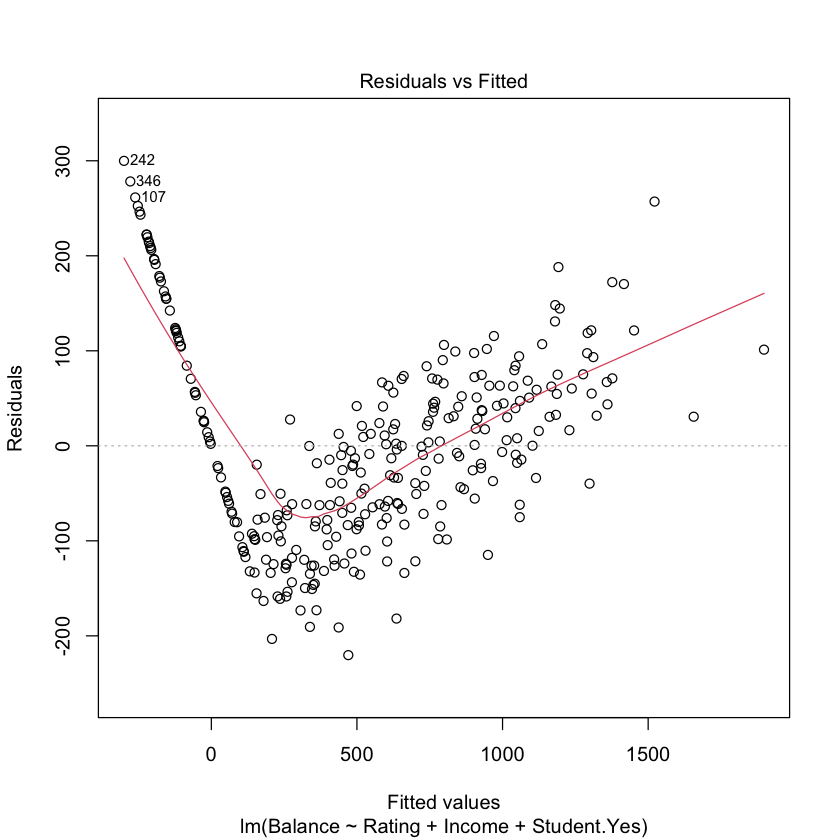

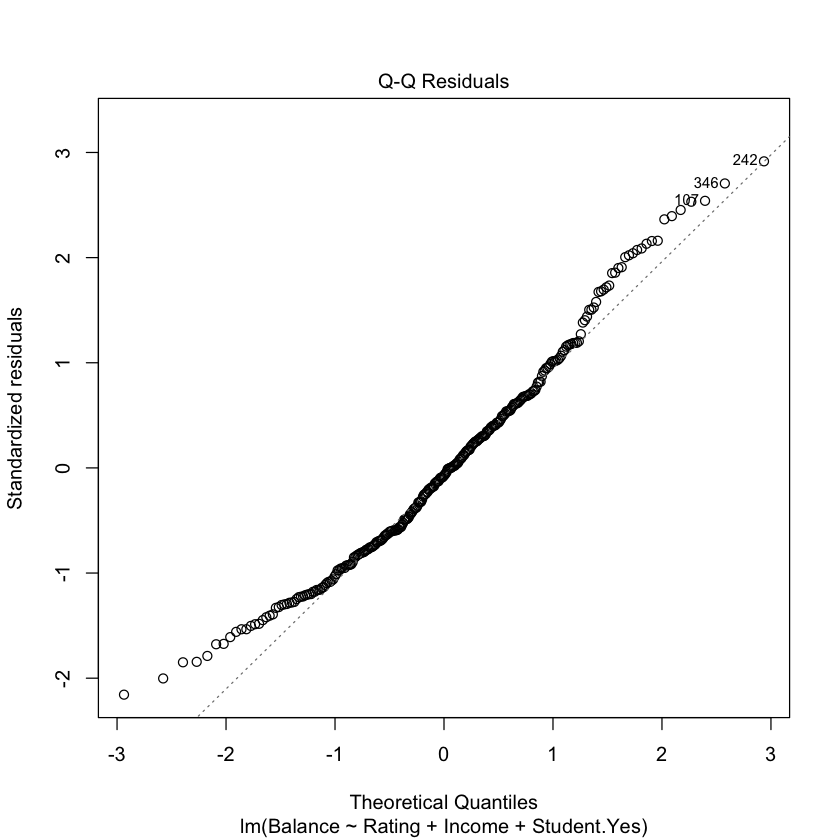

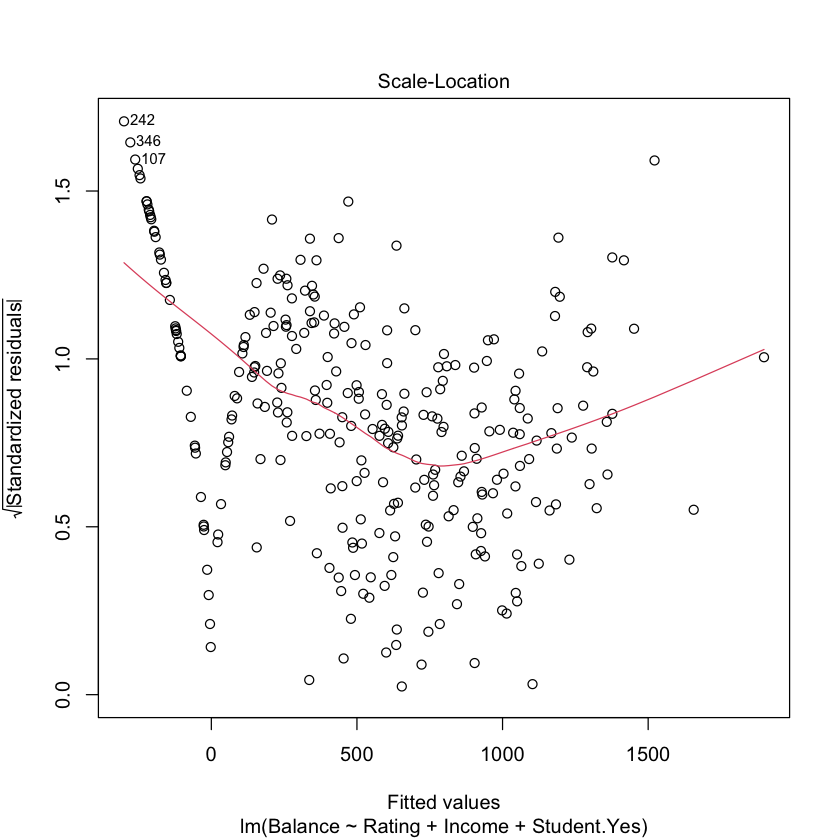

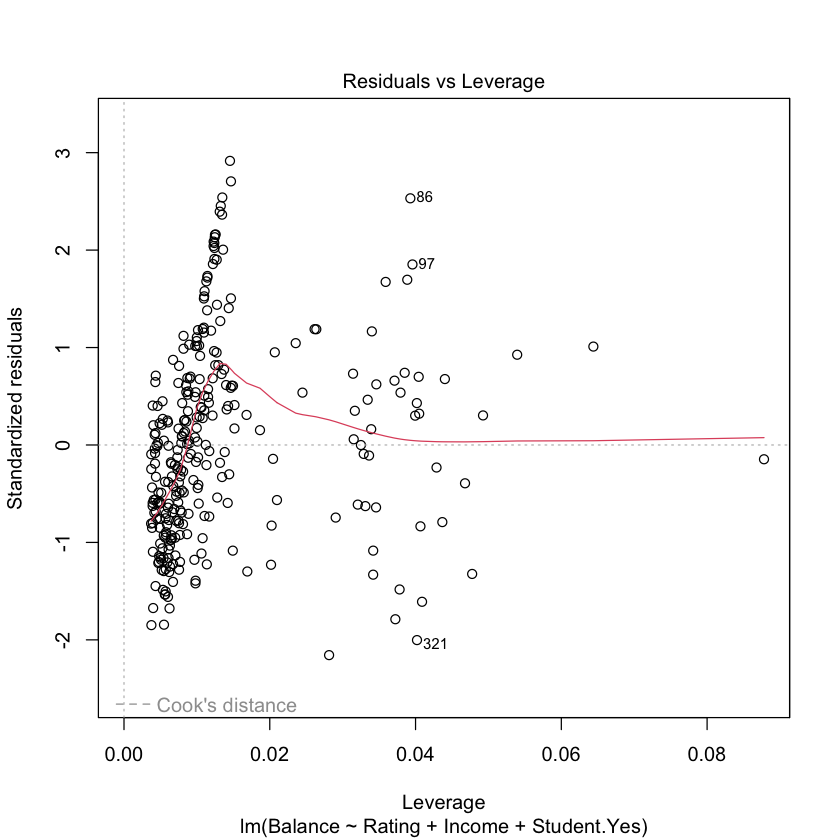

In [36]:
# model diagnostics
par(bg = "#ffffff")
plot(model.forward.BIC)

# Residuals vs. Fitted Plot:
# - although it seems to be homoscedastic, there seems to be a clear U shape
# - may be mitigated using polynomials and/or interaction terms

# QQ plot:
# - normality assumption is maintained in the middle but not on either tail end
# - indicaates a response distribution with a fatter tail than normal distr

In [37]:
# Task 9: Effects of regularization
# a - explain whether alpha = 0 is approriate for this study
# -- use the same post releveling vars from task 5 for the next tasks
# b - fit an elastic net with alpha = 0.5, and each of the following lambda values:
# -- 0, 10, 100, 500, 1000
# c - fit an elastic net with lambda = 10 and following values of alpha:
# -- 0, 0.5, 1

# note that alpha = 0.5 is an even mix between ridge and lasso

# glmnet() can be used to fit ridge, lasso, and general elastic nets
# its syntax requires us to create a design matrix first

X.train <- model.matrix(Balance ~ . + Income:Student, data = data.train)
head(X.train)

,(Intercept),Income,Rating,Cards,Age,Education,Gender Male,StudentYes,MarriedNo,EthnicityAfrican American,EthnicityAsian,Income:StudentYes
1,1,14.891,283,2,34,11,1,0,0,0,0,0.000
2,1,106.025,483,3,82,15,0,1,0,0,1,106.025
3,1,104.593,514,4,71,11,1,0,1,0,1,0.000
6,1,80.180,569,4,77,10,1,0,1,0,0,0.000
8,1,71.408,512,2,87,9,1,0,1,0,1,0.000
9,1,15.125,266,5,66,13,0,0,1,0,0,0.000


In [41]:
library(glmnet)
m.lambda <- glmnet(
    x = X.train,
    y = data.train$Balance,
    family = "gaussian",
    lambda = c(0, 10, 100, 500, 1000),
    alpha = 0.5
)

# note - the parameter a0 is a vector of intercept estimates for each lambda
# - parameter beta is a matrix of coef estimates excluding intercept
# - arranged by colums according to different lambdas

m.lambda$a0
m.lambda$beta

# easier way to see this:
coef(m.lambda)

# right to left, decreasing lambda

s0        s1        s2        s3        s4 
 520.4352  301.2973 -224.9669 -506.0179 -579.1925

12 x 5 sparse Matrix of class "dgCMatrix"
                          s0        s1         s2           s3          s4
(Intercept)                . .           .          .            .        
Income                     . .           .         -6.63360837  -7.9320588
Rating                     . 0.6182676   2.034434   3.71042914   4.0114839
Cards                      . .           .          0.51433943   2.9161946
Age                        . .           .         -0.70550849  -0.7885101
Education                  . .           .          .            0.8874960
Gender Male                . .           .          3.08510246  18.3671409
StudentYes                 . .         228.762987 396.62014836 396.2181065
MarriedNo                  . .           .          9.36968005  20.4646766
EthnicityAfrican American  . .           .          .          -11.9281110
EthnicityAsian             . .           .          .           -5.3983474
Income:StudentYes          . .           .          0.0147

13 x 5 sparse Matrix of class "dgCMatrix"
                                s0          s1          s2            s3
(Intercept)               520.4352 301.2973356 -224.966926 -506.01794831
(Intercept)                 .        .            .           .         
Income                      .        .            .          -6.63360837
Rating                      .        0.6182676    2.034434    3.71042914
Cards                       .        .            .           0.51433943
Age                         .        .            .          -0.70550849
Education                   .        .            .           .         
Gender Male                 .        .            .           3.08510246
StudentYes                  .        .          228.762987  396.62014836
MarriedNo                   .        .            .           9.36968005
EthnicityAfrican American   .        .            .           .         
EthnicityAsian              .        .            .           .         
Income:St

In [42]:
mean(data.train$Balance)

[1] 520.4352

In [46]:
# effects of alpha
# now use lambda = 10 and 3 values of alpha
m.ridge <- glmnet(
    x = X.train,
    y = data.train$Balance,
    family = "gaussian",
    lambda = 10,
    alpha = 0
)
coef(m.ridge)

m.elastic.net <- glmnet(
    x = X.train,
    y = data.train$Balance,
    family = "gaussian",
    lambda = 10,
    alpha = 0.5
)
coef(m.elastic.net)

m.lasso <- glmnet(
    x = X.train,
    y = data.train$Balance,
    family = "gaussian",
    lambda = 10,
    alpha = 1
)
coef(m.lasso)

# using ridge regression, all coef remain in the model (recall, ridge does not eliminate)
# as we approach lasso, more and more coeff are eliminated

13 x 1 sparse Matrix of class "dgCMatrix"
                                    s0
(Intercept)               -523.1425558
(Intercept)                  .        
Income                      -6.7527542
Rating                       3.7206517
Cards                        5.1458389
Age                         -0.9951610
Education                    0.9865913
Gender Male                 14.7246861
StudentYes                 390.5753292
MarriedNo                   20.1062205
EthnicityAfrican American  -10.0938906
EthnicityAsian              -4.4600751
Income:StudentYes            0.4123221

13 x 1 sparse Matrix of class "dgCMatrix"
                                     s0
(Intercept)               -506.12459472
(Intercept)                  .         
Income                      -6.63607145
Rating                       3.71092344
Cards                        0.51137109
Age                         -0.70475760
Education                    .         
Gender Male                  3.09011900
StudentYes                 396.73965576
MarriedNo                    9.36635692
EthnicityAfrican American    .         
EthnicityAsian               .         
Income:StudentYes            0.01376411

13 x 1 sparse Matrix of class "dgCMatrix"
                                    s0
(Intercept)               -512.8489140
(Intercept)                  .        
Income                      -6.5545455
Rating                       3.6995110
Cards                        .        
Age                         -0.4335963
Education                    .        
Gender Male                  .        
StudentYes                 386.5699781
MarriedNo                    .        
EthnicityAfrican American    .        
EthnicityAsian               .        
Income:StudentYes            .        

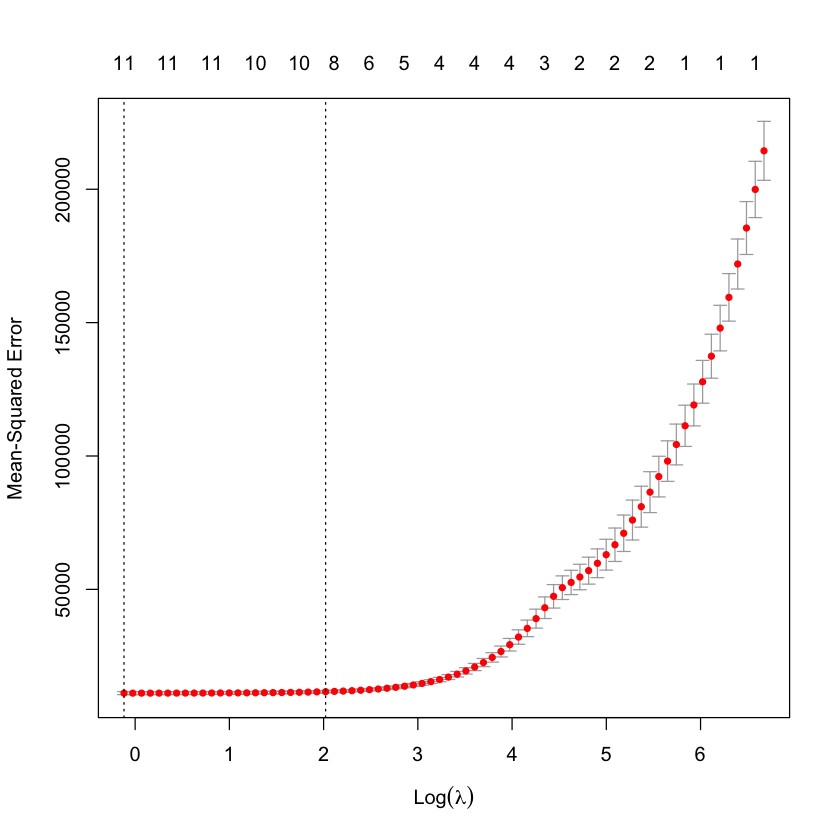

In [48]:
# Task 10: Fit optimally tuned elastic nets
# a - use CV to select 2 values of lambda for fitting nets in task 9 with alpha = 0.5
# a_i - list features in the resulting model. compare to task 7
# b - recommend final model to use between the two elastic nets and the task 7 model

# note - cv.glmnet() allows hyperparameter tuning
# plotting it returns an error curve
# in the plot:
# - red dots are CV error for a resp. range of lambda
# - numbers at top indicate how many features have non-0 coef est.
# - first vertical line corresponds to value of lambda where cv error is minimized
# - second vertical vertical line uses the 1-SE rule, the greatest value of lambda within 1 SE.

set.seed(1111)
m <- cv.glmnet(
    x = X.train,
    y = data.train$Balance,
    family = "gaussian",
    alpha = 0.5
)

par(bg = "#ffffff")
plot(m)

In [50]:
# fit regularized model with lambda = lambda.min

m.min <- glmnet(
    x = X.train,
    y = data.train$Balance,
    family = "gaussian",
    lambda = m$lambda.min,
    alpha = 0.5
)

m.min$beta

# design matrix for test
X.test <- model.matrix(Balance ~ . + Income:Student, data = data.test)

# predict on test and calculate test RMSE
m.min.pred <- predict(m.min, newx = X.test)
RMSE(data.test$Balance, m.min.pred)

# The RMSE is higher than the task 7 model of 102.67

12 x 1 sparse Matrix of class "dgCMatrix"
                                   s0
(Intercept)                 .        
Income                     -7.8131829
Rating                      3.9839963
Cards                       2.6915109
Age                        -0.7829239
Education                   0.7557949
Gender Male                17.0049498
StudentYes                396.3329355
MarriedNo                  19.4182020
EthnicityAfrican American  -9.9708020
EthnicityAsian             -3.6479011
Income:StudentYes           0.4458288

[1] 103.9201

In [53]:
# fit the regularized model with the 1se lambda:
m.1se <- glmnet(
    x = X.train,
    y = data.train$Balance,
    family = "gaussian",
    lambda = m$lambda.1se,
    alpha = 0.5
)

m.1se$beta

m.1se.pred <- predict(m.1se, newx = X.test)
RMSE(data.test$Balance, m.1se.pred)

# the rmse is improved from the min lambda, but is still not as
# good as task 7 stepwise model.
# Taking predicution accuracy and interpretability into account, we
# recommend using the forward BIC model as the final model

12 x 1 sparse Matrix of class "dgCMatrix"
                                   s0
(Intercept)                 .        
Income                     -6.9378441
Rating                      3.7813573
Cards                       1.1075391
Age                        -0.7305808
Education                   .        
Gender Male                 6.7717419
StudentYes                397.5199346
MarriedNo                  11.6768447
EthnicityAfrican American   .        
EthnicityAsian              .        
Income:StudentYes           0.1148304

[1] 102.8241